In [2]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

In [3]:
f=open("tweets_response.json","rb")
res=f.read()
tweet=json.loads(res)

In [4]:
#tweet=json.loads("tweets_response.json")

In [5]:
def moving_average(data_array, n=3):
    """
    Calcuate the moving average based on the specific data array.
    :param data_array: the array stored data to be calculated.
    :param n: the number of data in one time
    :return: Generate which contains the result
    """
    it = iter(data_array)
 
    d = deque(itertools.islice(it, n - 1))
    s = sum(d)
    # In the first round, to avoid getting extra element, so need zero in the head of queue.
    d.appendleft(0)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / float(n)
    return d


In [6]:
case1=pd.read_excel("case.xlsx")

In [7]:
case1

,date,case1,case2,date2
0,2021-05-11,1,619815,5.11
1,2021-05-12,1,655623,5.12
2,2021-05-13,1,756830,5.13
3,2021-05-14,1,734185,5.14
4,2021-05-15,4,690866,5.15
5,2021-05-16,1,671532,5.16
6,2021-05-17,0,601460,5.17
7,2021-05-18,1,518119,5.18


In [9]:
import  seaborn as sns

In [10]:
#cases_1.plot.bar(data=case1)

In [11]:
#sns.barplot(y="case1", data=cases_1)

In [12]:
case2=pd.read_excel("case2.xlsx")

In [13]:
case2

,date1,cases,site
0,2021-05-11,1,Melbourne
1,2021-05-12,1,Melbourne
2,2021-05-13,1,Melbourne
3,2021-05-14,1,Melbourne
4,2021-05-15,4,Melbourne
5,2021-05-16,1,Melbourne
6,2021-05-17,0,Melbourne
7,2021-05-18,1,Melbourne
8,2021-05-11,619815,world
9,2021-05-12,655623,world


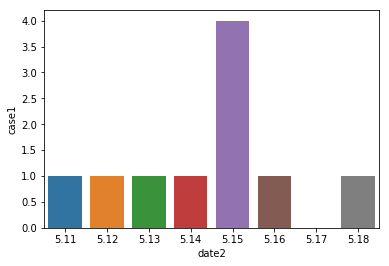

In [14]:
sns.barplot(y="case1",x="date2",data=case1)

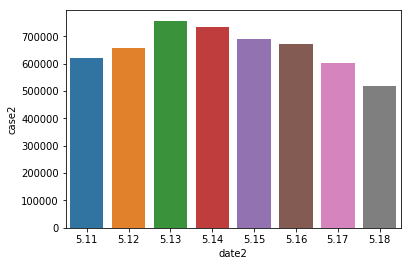

In [15]:
sns.barplot(y="case2",x="date2",data=case1)

In [16]:
moving_average(case1["case1"],2)

<generator object moving_average at 0x0000018427F5D9E8>

In [17]:
def moving_average1(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [18]:
case1_ma=moving_average1(np.asarray(case1["case1"]),2)

In [19]:
#sns.plot()

In [20]:
case1_ma
im

NameError: name 'im' is not defined

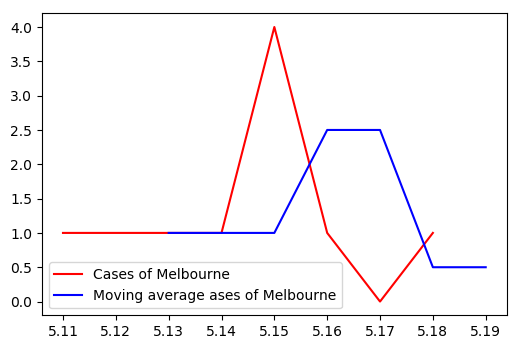

In [21]:
plt.figure(dpi=100)
date1=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
date2=["5.13","5.14","5.15","5.16","5.17","5.18","5.19"]
plt.plot(date1,case1["case1"],'r',label='Cases of Melbourne')
plt.plot(date2,case1_ma,'b',label='Moving average ases of Melbourne')
plt.legend(loc=0)
plt.show()

In [22]:
case2_ma=moving_average1(np.asarray(case1["case2"]),2)

In [23]:
case2_ma

array([637719. , 706226.5, 745507.5, 712525.5, 681199. , 636496. ,
       559789.5])

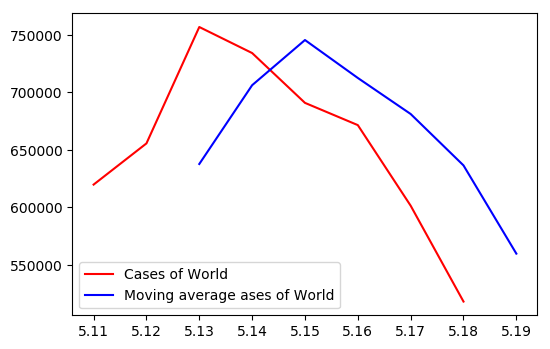

In [24]:
plt.figure(dpi=100)
date1=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
date2=["5.13","5.14","5.15","5.16","5.17","5.18","5.19"]
plt.plot(date1,case1["case2"],'r',label='Cases of World')
plt.plot(date2,case2_ma,'b',label='Moving average ases of World')
plt.legend(loc=0)
plt.show()

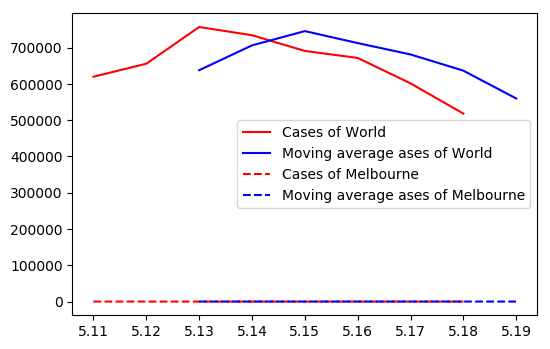

In [25]:
plt.figure(dpi=100)
date1=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
date2=["5.13","5.14","5.15","5.16","5.17","5.18","5.19"]
plt.plot(date1,case1["case2"],'r',label='Cases of World')
plt.plot(date2,case2_ma,'b',label='Moving average ases of World')
plt.plot(date1,case1["case1"],'r--',label='Cases of Melbourne')
plt.plot(date2,case1_ma,'b--',label='Moving average ases of Melbourne')
plt.legend(loc=0)
plt.show()

In [26]:
data_tweet=pd.DataFrame(tweet)

In [27]:
data_tweet.head()

,total_rows,offset,rows
0,12960,0,"{'id': '1344941724192411650', 'key': '13449417..."
1,12960,0,"{'id': '1391880059158372352', 'key': '13918800..."
2,12960,0,"{'id': '1391880274254856193', 'key': '13918802..."
3,12960,0,"{'id': '1391880708243615746', 'key': '13918807..."
4,12960,0,"{'id': '1391880708579217411', 'key': '13918807..."


In [28]:
#data_tweet.loc[1,"rows"].split(str=" ")

In [29]:
#for i in range(12961):
#    df=pd.DataFrame(data_tweet.loc[i,"rows"]))
    

SyntaxError: invalid syntax (<ipython-input-29-bdd57d37465f>, line 2)

In [31]:
data_tweet.loc[1,"rows"].items()

dict_items([('id', '1391880059158372352'), ('key', '1391880059158372352'), ('value', {'_id': '1391880059158372352', '_rev': '1-b421d3ce261c4a65eba1473f2f62980f', 'text': 'RT @docranjana: RIP Dr. Anas Mujahid, just 26, with a lifetime ahead. Tested positive at 8pm, gone by 3am. Sending our concern and condolen…', 'sentiment': 'positive', 'created_at': 'Mon May 10 22:17:20 +0000 2021', 'retweet_count': 780, 'favorite_count': 0})])

In [32]:
data_tweet.loc[1,"rows"]

{'id': '1391880059158372352',
 'key': '1391880059158372352',
 'value': {'_id': '1391880059158372352',
  '_rev': '1-b421d3ce261c4a65eba1473f2f62980f',
  'text': 'RT @docranjana: RIP Dr. Anas Mujahid, just 26, with a lifetime ahead. Tested positive at 8pm, gone by 3am. Sending our concern and condolen…',
  'sentiment': 'positive',
  'created_at': 'Mon May 10 22:17:20 +0000 2021',
  'retweet_count': 780,
  'favorite_count': 0}}

In [33]:
data_tweet.loc[1,"rows"]["value"]["text"]

'RT @docranjana: RIP Dr. Anas Mujahid, just 26, with a lifetime ahead. Tested positive at 8pm, gone by 3am. Sending our concern and condolen…'

In [34]:
day_='Mon May 10 22:17:20 +0000 2021'.split(" ")
day_[1]+" "+day_[2]+" "+ day_[5]


'May 10 2021'

In [35]:
ids=[]
key=[]
text=[]
sentiment=[]
created_at=[]
retweet_count=[]
month=[]
day=[]
favorite_count=[]
for i in range(12951):
    ids.append(data_tweet.loc[i,"rows"]["id"])
    key.append(data_tweet.loc[i,"rows"]["key"])
    #有些tweet没有sentiment，所以不取了
    #sentiment.append(data_tweet.loc[i,"rows"]["value"]["sentiment"])
    #text.append(data_tweet.loc[i,"rows"]["value"]["text"])
    created_at.append(data_tweet.loc[i,"rows"]["value"]["created_at"])
    #retweet_count.append(data_tweet.loc[i,"rows"]["value"]["retweet_count"])
    #favorite_count.append(data_tweet.loc[i,"rows"]["value"]["favorite_count"])
    days=data_tweet.loc[i,"rows"]["value"]["created_at"].split(" ")
    day.append(days[1]+" "+days[2]+" "+ days[5])
#data_tweets=pd.DataFrame({"id":ids,"key":key,"sentiment":sentiment,"text":text,"created_at":created_at,"retweet_count":retweet_count,"favorite_count":favorite_count,"day":day})
data_tweets=pd.DataFrame({"id":ids,"key":key,"created_at":created_at,"day":day})
    

In [36]:
data_tweets.head()

,id,key,created_at,day
0,1344941724192411650,1344941724192411650,Fri Jan 01 09:41:09 +0000 2021,Jan 01 2021
1,1391880059158372352,1391880059158372352,Mon May 10 22:17:20 +0000 2021,May 10 2021
2,1391880274254856193,1391880274254856193,Mon May 10 22:18:11 +0000 2021,May 10 2021
3,1391880708243615746,1391880708243615746,Mon May 10 22:19:55 +0000 2021,May 10 2021
4,1391880708579217411,1391880708579217411,Mon May 10 22:19:55 +0000 2021,May 10 2021


In [37]:
data_tweets.groupby("day").count()

,id,key,created_at
day,,,
Dec 13 2015,1,1,1
Dec 23 2015,1,1,1
Jan 01 2015,1,1,1
Jan 01 2021,1,1,1
Jan 10 2016,1,1,1
Jan 18 2015,1,1,1
May 10 2021,157,157,157
May 11 2021,2486,2486,2486
May 12 2021,1659,1659,1659


In [38]:
data_tweets.groupby("day").count().loc["May 10 2021":"May 18 2021","id"]

day
May 10 2021     157
May 11 2021    2486
May 12 2021    1659
May 13 2021    1309
May 14 2021    1370
May 15 2021    1163
May 16 2021    1425
May 17 2021    1711
May 18 2021    1660
Name: id, dtype: int64

In [39]:
tweet_count=np.asarray(data_tweets.groupby("day").count().loc["May 11 2021":"May 18 2021","id"])

In [40]:
tweet_count

array([2486, 1659, 1309, 1370, 1163, 1425, 1711, 1660], dtype=int64)

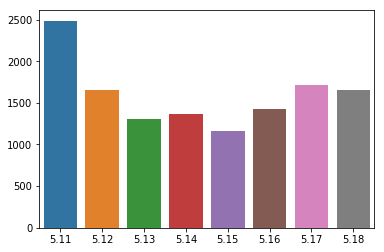

In [56]:
sns.barplot(y=tweet_count,x=[5.11,5.12,5.13,5.14,5.15,5.16,5.17,5.18])

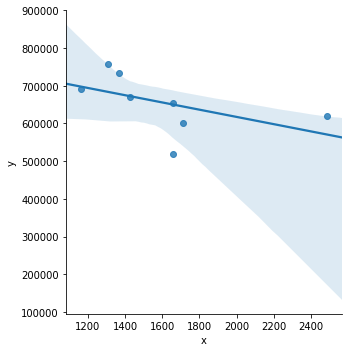

In [45]:
#import seaborn as sns 
abc=pd.DataFrame({"y":case1["case2"],"x":tweet_count})
sns.lmplot(x="x", y="y",data=abc)

In [51]:
#np.polyfit(x=tweet_count,y=case1["case2"],deg=1)
from scipy.stats import linregress as line

In [53]:
line(x=tweet_count,y=case1["case2"])

LinregressResult(slope=-95.98893137787317, intercept=809432.0637254191, rvalue=-0.5111535438096118, pvalue=0.19544310545438404, stderr=65.89230319180747)

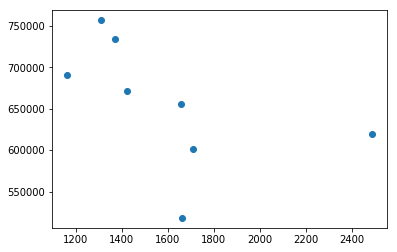

In [140]:
plt.scatter(tweet_count, case1["case2"])


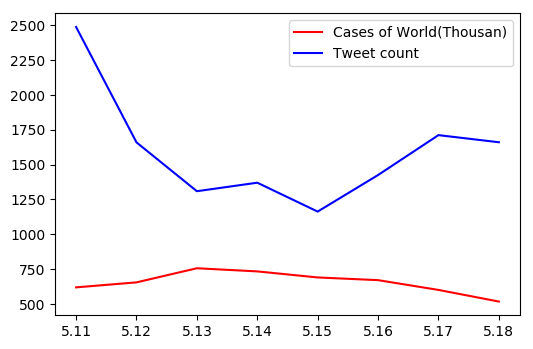

In [143]:
plt.figure(dpi=100)
date=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
plt.plot(date,case1["case2"]/1000,'r',label='Cases of World(Thousan)')
plt.plot(date,tweet_count,'b',label='Tweet count ')
plt.legend(loc=0)
plt.show()

In [144]:
#data_tweet.loc[0,"rows"]["value"]["sentiment"]

In [145]:
#data_tweet.loc[0,"rows"]

In [ ]:
ids=[]
key=[]
text=[]
sentiment=[]
created_at=[]
retweet_count=[]
month=[]
day=[]
favorite_count=[]
for i in range(12951):
    ids.append(data_tweet.loc[i,"rows"]["id"])
    key.append(data_tweet.loc[i,"rows"]["key"])
    #有些tweet没有sentiment，所以不取了
    #sentiment.append(data_tweet.loc[i,"rows"]["value"]["sentiment"])
    #text.append(data_tweet.loc[i,"rows"]["value"]["text"])
    created_at.append(data_tweet.loc[i,"rows"]["value"]["created_at"])
    #retweet_count.append(data_tweet.loc[i,"rows"]["value"]["retweet_count"])
    #favorite_count.append(data_tweet.loc[i,"rows"]["value"]["favorite_count"])
    days=data_tweet.loc[i,"rows"]["value"]["created_at"].split(" ")
    day.append(days[1]+" "+days[2]+" "+ days[5])
#data_tweets=pd.DataFrame({"id":ids,"key":key,"sentiment":sentiment,"text":text,"created_at":created_at,"retweet_count":retweet_count,"favorite_count":favorite_count,"day":day})
data_tweets=pd.DataFrame({"id":ids,"key":key,"created_at":created_at,"day":day})
    

In [148]:
data_tweets.loc[1,"created_at"].split(" ")[3].split(":")[0]

'22'

In [149]:
times=[]
for i in range(12951):
    time=data_tweets.loc[i,"created_at"].split(" ")[3].split(":")[0]
    times.append(time)
data_tweets["time"]=times

In [150]:
data_tweets.head(15)

,id,key,created_at,day,time
0,1344941724192411650,1344941724192411650,Fri Jan 01 09:41:09 +0000 2021,Jan 01 2021,09
1,1391880059158372352,1391880059158372352,Mon May 10 22:17:20 +0000 2021,May 10 2021,22
2,1391880274254856193,1391880274254856193,Mon May 10 22:18:11 +0000 2021,May 10 2021,22
3,1391880708243615746,1391880708243615746,Mon May 10 22:19:55 +0000 2021,May 10 2021,22
4,1391880708579217411,1391880708579217411,Mon May 10 22:19:55 +0000 2021,May 10 2021,22
5,1391880754037067777,1391880754037067777,Mon May 10 22:20:06 +0000 2021,May 10 2021,22
6,1391880848723435520,1391880848723435520,Mon May 10 22:20:28 +0000 2021,May 10 2021,22
7,1391881631166652419,1391881631166652419,Mon May 10 22:23:35 +0000 2021,May 10 2021,22
8,1391882142905368579,1391882142905368579,Mon May 10 22:25:37 +0000 2021,May 10 2021,22
9,1391882309276635140,1391882309276635140,Mon May 10 22:26:17 +0000 2021,May 10 2021,22


In [151]:
tweets_512=data_tweets[data_tweets.loc[:,"day"]=="May 12 2021"]

In [158]:
count_bytime_512=np.asarray(tweets_512.groupby("time").count()["id"])

In [159]:
count_bytime_512

array([111,  92,  88,  55,  74,  73, 123, 120,  77, 103, 110, 113,  80,
        64,  24,  22,  10,  20,  14,  27,  28,  74,  87,  70], dtype=int64)

In [160]:
tweets_513=data_tweets[data_tweets.loc[:,"day"]=="May 13 2021"]
count_bytime_513=np.asarray(tweets_513.groupby("time").count()["id"])

In [161]:
tweets_514=data_tweets[data_tweets.loc[:,"day"]=="May 14 2021"]
count_bytime_514=np.asarray(tweets_514.groupby("time").count()["id"])

In [162]:
tweets_515=data_tweets[data_tweets.loc[:,"day"]=="May 15 2021"]
count_bytime_515=np.asarray(tweets_515.groupby("time").count()["id"])

In [163]:
tweets_516=data_tweets[data_tweets.loc[:,"day"]=="May 16 2021"]
count_bytime_516=np.asarray(tweets_516.groupby("time").count()["id"])

In [164]:
tweets_517=data_tweets[data_tweets.loc[:,"day"]=="May 17 2021"]
count_bytime_517=np.asarray(tweets_517.groupby("time").count()["id"])

In [165]:
tweets_518=data_tweets[data_tweets.loc[:,"day"]=="May 18 2021"]
count_bytime_518=np.asarray(tweets_518.groupby("time").count()["id"])

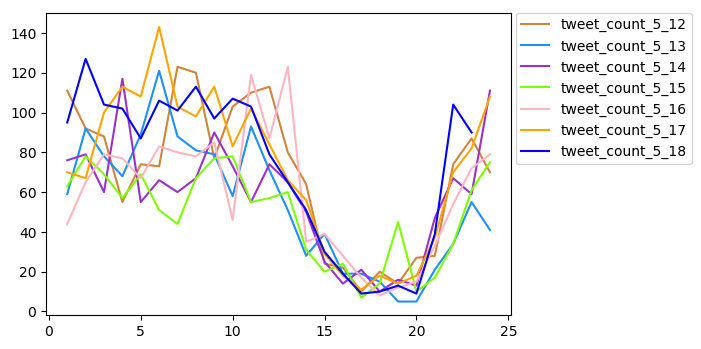

In [177]:
plt.figure(dpi=100)
#date=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
x=list(range(1,25))
plt.plot(x,count_bytime_512,'peru',label='tweet_count_5_12')
plt.plot(x,count_bytime_513,'dodgerblue',label='tweet_count_5_13')
plt.plot(x,count_bytime_514,'darkorchid',label='tweet_count_5_14')
plt.plot(x,count_bytime_515,'chartreuse',label='tweet_count_5_15')
plt.plot(x,count_bytime_516,'lightpink',label='tweet_count_5_16')
plt.plot(x,count_bytime_517,'orange',label='tweet_count_5_17')
plt.plot(list(range(1,24)),count_bytime_518,'b',label='tweet_count_5_18')
plt.legend(loc=[1.01,0.5])
plt.show()

In [169]:
tweets_512

,id,key,created_at,day,time
2644,1392268284008009729,1392268284008009729,Wed May 12 00:00:00 +0000 2021,May 12 2021,00
2645,1392268320762703876,1392268320762703876,Wed May 12 00:00:09 +0000 2021,May 12 2021,00
2646,1392268374579851271,1392268374579851271,Wed May 12 00:00:22 +0000 2021,May 12 2021,00
2647,1392268403704930308,1392268403704930308,Wed May 12 00:00:29 +0000 2021,May 12 2021,00
2648,1392268494062772225,1392268494062772225,Wed May 12 00:00:50 +0000 2021,May 12 2021,00
2649,1392268858052907008,1392268858052907008,Wed May 12 00:02:17 +0000 2021,May 12 2021,00
2650,1392268884460195841,1392268884460195841,Wed May 12 00:02:23 +0000 2021,May 12 2021,00
2651,1392268948087791617,1392268948087791617,Wed May 12 00:02:38 +0000 2021,May 12 2021,00
2652,1392268948901568513,1392268948901568513,Wed May 12 00:02:39 +0000 2021,May 12 2021,00
2653,1392269025925767168,1392269025925767168,Wed May 12 00:02:57 +0000 2021,May 12 2021,00


In [ ]:
#time to Australia
np.abs()
plt.figure(dpi=100)
#date=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
x=list(range(1,25))
plt.plot(x,count_bytime_512,'peru',label='tweet_count_5_12')
plt.plot(x,count_bytime_513,'dodgerblue',label='tweet_count_5_13')
plt.plot(x,count_bytime_514,'darkorchid',label='tweet_count_5_14')
plt.plot(x,count_bytime_515,'chartreuse',label='tweet_count_5_15')
plt.plot(x,count_bytime_516,'lightpink',label='tweet_count_5_16')
plt.plot(x,count_bytime_517,'orange',label='tweet_count_5_17')
plt.plot(list(range(1,24)),count_bytime_518,'b',label='tweet_count_5_18')
plt.legend(loc=[1.01,0.5])
plt.show()

In [181]:
count_bytime_518

array([ 95, 127, 104, 102,  87, 106, 101, 113,  97, 107, 103,  79,  65,
        51,  30,  19,   9,  10,  13,   9,  39, 104,  90], dtype=int64)

In [183]:
count_bytime_518[[10,11,12,13,14,15,16,17,18,19,20,21,22,0,1,2,3,4,5,6,7,8,9]]

array([103,  79,  65,  51,  30,  19,   9,  10,  13,   9,  39, 104,  90,
        95, 127, 104, 102,  87, 106, 101, 113,  97, 107], dtype=int64)

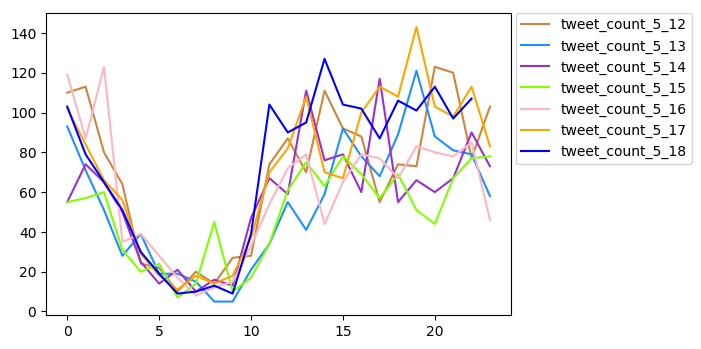

In [185]:
time_aus=[10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9]
time_aus_518=[10,11,12,13,14,15,16,17,18,19,20,21,22,0,1,2,3,4,5,6,7,8,9]
plt.figure(dpi=100)
x=list(range(0,24))
plt.plot(x,count_bytime_512[time_aus],'peru',label='tweet_count_5_12')
plt.plot(x,count_bytime_513[time_aus],'dodgerblue',label='tweet_count_5_13')
plt.plot(x,count_bytime_514[time_aus],'darkorchid',label='tweet_count_5_14')
plt.plot(x,count_bytime_515[time_aus],'chartreuse',label='tweet_count_5_15')
plt.plot(x,count_bytime_516[time_aus],'lightpink',label='tweet_count_5_16')
plt.plot(x,count_bytime_517[time_aus],'orange',label='tweet_count_5_17')
plt.plot(list(range(0,23)),count_bytime_518[time_aus_518],'b',label='tweet_count_5_18')
plt.legend(loc=[1.01,0.5])
plt.show()

In [187]:
tweet_count_519=count_bytime_517[time_aus][0:23]*0.5+count_bytime_518[time_aus_518][0:23]*0.5

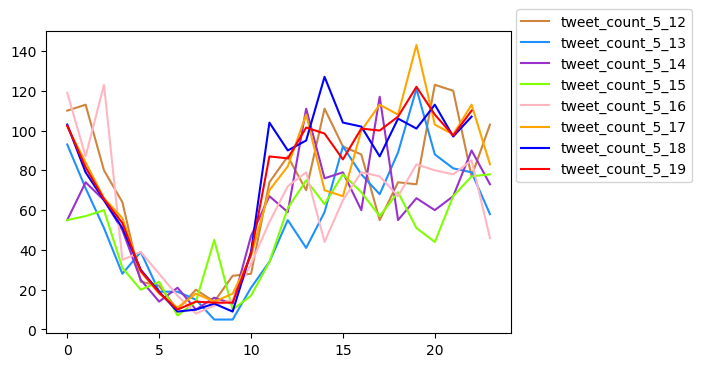

In [189]:
time_aus=[10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9]
time_aus_518=[10,11,12,13,14,15,16,17,18,19,20,21,22,0,1,2,3,4,5,6,7,8,9]
plt.figure(dpi=100)
x=list(range(0,24))
plt.plot(x,count_bytime_512[time_aus],'peru',label='tweet_count_5_12')
plt.plot(x,count_bytime_513[time_aus],'dodgerblue',label='tweet_count_5_13')
plt.plot(x,count_bytime_514[time_aus],'darkorchid',label='tweet_count_5_14')
plt.plot(x,count_bytime_515[time_aus],'chartreuse',label='tweet_count_5_15')
plt.plot(x,count_bytime_516[time_aus],'lightpink',label='tweet_count_5_16')
plt.plot(x,count_bytime_517[time_aus],'orange',label='tweet_count_5_17')
plt.plot(list(range(0,23)),count_bytime_518[time_aus_518],'b',label='tweet_count_5_18')
plt.plot(list(range(0,23)),tweet_count_519,'r',label='tweet_count_5_19')
plt.legend(loc=[1.01,0.5])
plt.show()